### Data analysis of Section 5 data.

1. Check all 6 surface maps without thermal compensation (250107)
1. Check all 6 surface maps with thermal compensation (use this for all following steps)
2. average surface maps
2. check the forces applied and compare to polishing forces we intended to apply
4. Compare the residual surfaces above to surfaces at S3 acceptance, with and without thermal compensation
5. Can we explain the difference in residual maps using difference in thermal conditions?
8. Repeat the above for the 250109 data (without AcO forces calculated at S3 acceptance)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.jet()

import sys
sys.path.insert(0, '../')
from M1S_tools import *
import glob
from scipy.io import savemat

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
## bending modes & influence matrices etc from Buddy #####################
ML actuators =  165 165
Afn =  (6991, 165)
fv =  (165, 165)
U matrix (6991, 165)
N node =  6991
## bending modes & influence matrices etc from Trupti #####################
N actuators =  170
/Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/influnce_matrix_files/OA_influence_matrices_all/OA_surface_normal_165SA_09Jan2025/
Afz =  (27547, 165)
U matrix (27547, 165)
S matrix (165, 165)

<Figure size 640x480 with 0 Axes>

//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set01 1pt87mm burst60 gmtMorph170614 LFSsub.h5: Tue Jan 07 12:43:32 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set02 1pt87mm burst60 gmtMorph170614 LFSsub.h5: Tue Jan 07 12:52:18 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set03 1pt87mm burst60 gmtMorph170614 LFSsub.h5: Tue Jan 07 13:00:39 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set04 1pt87mm burst60 gmtMorph170614 LFSsub.h5: Tue Jan 07 13:09:16 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set05 1pt87mm burst60 gmtMorph170614 LFSsub.h5: Tue Jan 07 13:26:43 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set06 1pt87mm burst60 gmtMorph170614 LFSsub.h5: Tue Jan 07 13:36:55 2025 


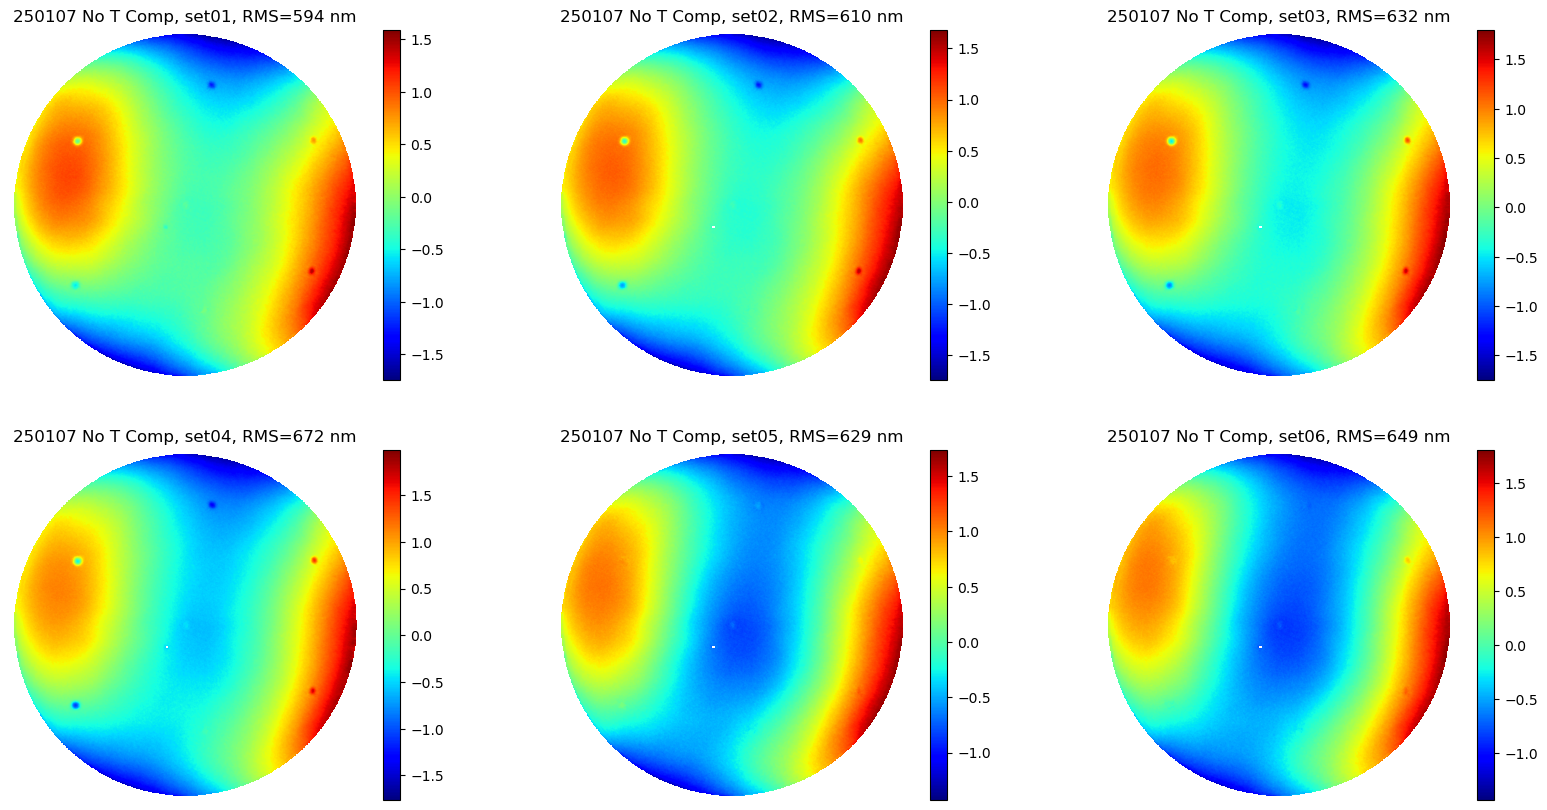

In [2]:
# without T comp
dateID = '250107'
ts_array = []
niter = 6
m1s_array = np.zeros((Sxn, Syn, niter))

fig, ax = plt.subplots(2,3,figsize=(20,10))
for i in range(6):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    
    fileset = sorted(glob.glob('/%s/Sec 5/%s/%s*set0%d*sub.h5'%(ml_data_dir,dateID, dateID, i+1)))
    assert len(fileset)==1
    m1s,centerRow,centerCol,pixelSize,ts = readH5Map(fileset)
    ts_array.append(ts)
    m1s_array[:,:, i] = m1s*1000
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    img = ax[irow][icol].imshow(m1s, origin='lower')
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('%s No T Comp, set0%d, RMS=%.0f nm'%(dateID,i+1, m1rms))
    ax[irow][icol].axis('off')

../GMT3 221011 221014 avg TPavgStitched -27modes.h5: date not in h5 file. 
0.01 0.01 427.0 422.0 427.0 422.0


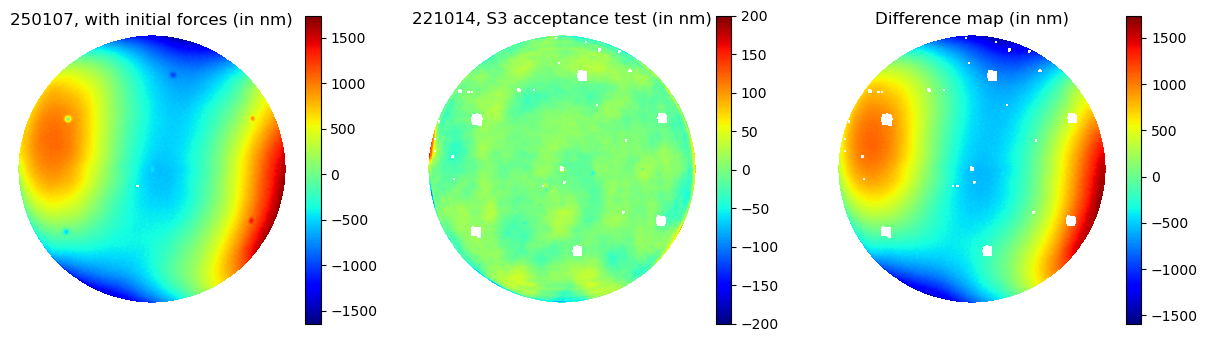

In [3]:
m1s = np.mean(m1s_array, axis=2)
filename = '../GMT3 221011 221014 avg TPavgStitched -27modes.h5'
m1s0,centerRow0,centerCol0,pixelSize0,ts0 = readH5Map([filename])
print(pixelSize[0], pixelSize0[0], centerRow[0], centerRow0[0], centerCol[0], centerCol0[0])
m1s0 = np.pad(m1s0*1000, pad_width=5, mode='constant', constant_values=np.nan)

fig, ax = plt.subplots(1,3,figsize=(15,4))
img = ax[0].imshow(m1s, origin='lower')#, vmin=-200, vmax=200)
fig.colorbar(img, ax=ax[0])
ax[0].set_title('250107, with initial forces (in nm)')

img = ax[1].imshow(m1s0, origin='lower', vmin=-200, vmax=200)
fig.colorbar(img, ax=ax[1])
ax[1].set_title('221014, S3 acceptance test (in nm)')

img = ax[2].imshow(m1s - m1s0, origin='lower')#, vmin=-200, vmax=200)
fig.colorbar(img, ax=ax[2])
ax[2].set_title('Difference map (in nm)')

for i in range(3):
    ax[i].axis('off')

//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set01 1pt87mm burst60 gmtMorph170614 LFSsub comp.h5: Tue Jan 07 12:43:32 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set02 1pt87mm burst60 gmtMorph170614 LFSsub comp.h5: Tue Jan 07 12:52:18 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set03 1pt87mm burst60 gmtMorph170614 LFSsub comp.h5: Tue Jan 07 13:00:39 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set04 1pt87mm burst60 gmtMorph170614 LFSsub comp.h5: Tue Jan 07 13:09:16 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set05 1pt87mm burst60 gmtMorph170614 LFSsub comp.h5: Tue Jan 07 13:26:43 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set06 1pt87mm burst60 gmtMorph170614 LFSsub comp.h5: Tue Jan 07 13:36:55 2025

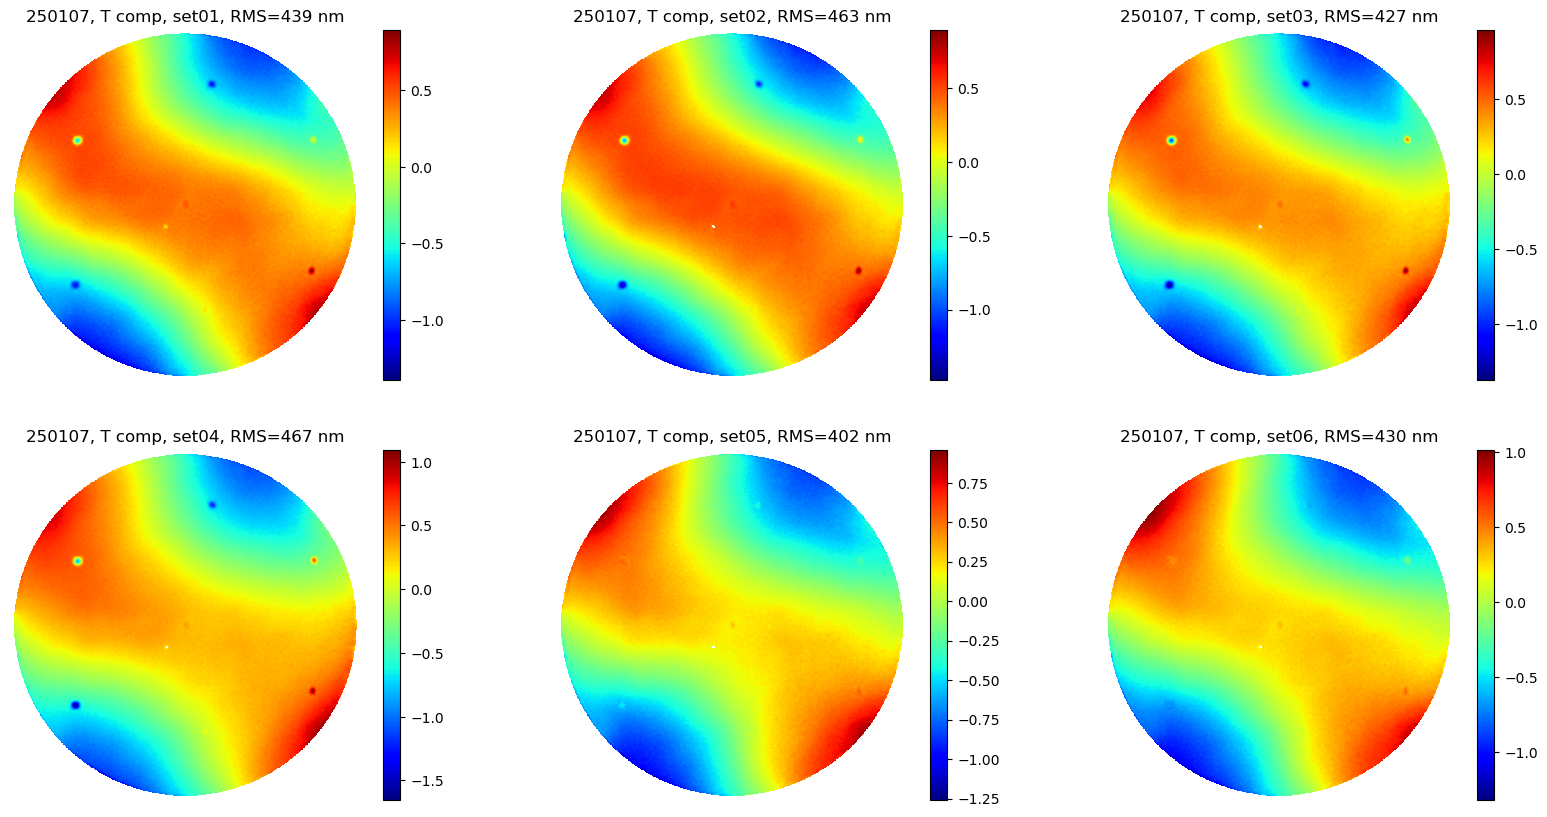

In [4]:
# with T comp
dateID = '250107'
m1sAve = np.zeros((Sxn, Syn))
fig, ax = plt.subplots(2,3,figsize=(20,10))
for i in range(6):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    
    fileset = sorted(glob.glob('/%s/Sec 5/%s/%s*set0%d*comp.h5'%(ml_data_dir,dateID, dateID, i+1)))
    assert len(fileset)==1
    m1s,centerRow,centerCol,pixelSize,ts = readH5Map(fileset)
    m1sAve += m1s
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    img = ax[irow][icol].imshow(m1s, origin='lower')
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('%s, T comp, set0%d, RMS=%.0f nm'%(dateID,i+1, m1rms))
    ax[irow][icol].axis('off')
m1sAve /= 6

../GMT3 221011 221014 avg TPavgStitched -27modes.h5: date not in h5 file. 
0.01 0.01 427.0 422.0 427.0 422.0


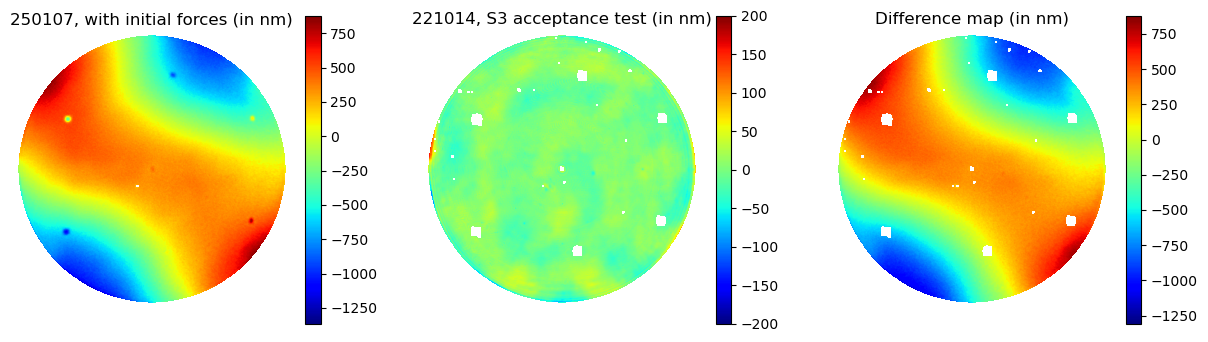

In [5]:
m1s = m1sAve*1000
filename = '../GMT3 221011 221014 avg TPavgStitched -27modes.h5'
m1s0,centerRow0,centerCol0,pixelSize0,ts0 = readH5Map([filename])
print(pixelSize[0], pixelSize0[0], centerRow[0], centerRow0[0], centerCol[0], centerCol0[0])
m1s0 = np.pad(m1s0*1000, pad_width=5, mode='constant', constant_values=np.nan)

fig, ax = plt.subplots(1,3,figsize=(15,4))
img = ax[0].imshow(m1s, origin='lower')#, vmin=-200, vmax=200)
fig.colorbar(img, ax=ax[0])
ax[0].set_title('%s, with initial forces (in nm)'%dateID)

img = ax[1].imshow(m1s0, origin='lower', vmin=-200, vmax=200)
fig.colorbar(img, ax=ax[1])
ax[1].set_title('221014, S3 acceptance test (in nm)')

img = ax[2].imshow(m1s - m1s0, origin='lower')#, vmin=-200, vmax=200)
fig.colorbar(img, ax=ax[2])
ax[2].set_title('Difference map (in nm)')

for i in range(3):
    ax[i].axis('off')

In [6]:
#get the forces,so that we can compare with those from day 2
sa_force1, tt = getDBData(unix_ts(ts)-120,'m1_s1_support_ctrl/s/sa_force/value', duration_in_s=120, samples=120)
sa_force1_z = np.mean(sa_force1,axis=0)[:,2]

# for checking mirror weight
ofl6, tt = getDBData(unix_ts(ts)-120,'m1_s1_support_ctrl/s/ofl_correction/value', duration_in_s=120, samples=120)
g_load, tt = getDBData(unix_ts(ts)-120,'m1_s1_support_ctrl/s/gravity_load/value', duration_in_s=120, samples=120)
sa_support_force, tt = getDBData(unix_ts(ts)-120,'m1_s1_support_ctrl/s/sa_support_force/value', 
                                 duration_in_s=120, samples=120)

m1_s1_support_ctrl/s/sa_force/value
2025-01-07 13:34:55  duration =  120  s
(120, 170, 3)
m1_s1_support_ctrl/s/ofl_correction/value
2025-01-07 13:34:55  duration =  120  s
(120, 6)
m1_s1_support_ctrl/s/gravity_load/value
2025-01-07 13:34:55  duration =  120  s
(120, 6)
m1_s1_support_ctrl/s/sa_support_force/value
2025-01-07 13:34:55  duration =  120  s
(120, 170, 3)


In [21]:
ofl6.shape

(120, 6)

In [26]:
print(g_load[:5,2])
print([np.round(i) for i in np.sum(sa_support_force, axis=1)[:5,2]], 
      np.round(np.mean(np.sum(sa_support_force, axis=1)[:,2])))
print([np.round(i) for i in np.sum(sa_force1, axis=1)[:5,2]], 
      np.round(np.mean(np.sum(sa_force1, axis=1)[:,2])))
print([np.round(i) for i in ofl6[:5,2]], 
      np.round(np.mean(ofl6[:5,2])))
print(np.round(np.mean(ofl6[:,2])))

[-158689. -158689. -158689. -158689. -158689.]
[-158739.0, -158692.0, -158701.0, -158713.0, -158724.0] -158737.0
[-163281.0, -163279.0, -163263.0, -163260.0, -163282.0] -163277.0
[-48.0, -5.0, -13.0, -24.0, -35.0] -25.0
-48.0


In [24]:
158737-158689, 163277 - 158737

(48, 4540)

//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250109/250109 GMT3 set01 1pt2mm burst60 gmtMorph170614 LFSsub.h5: Thu Jan 09 13:19:10 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250109/250109 GMT3 set02 1pt2mm burst60 gmtMorph170614 LFSsub.h5: Thu Jan 09 13:41:45 2025 


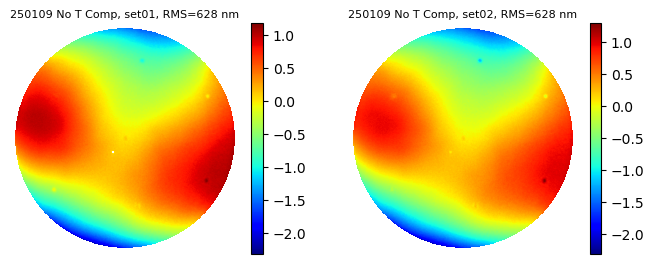

In [43]:
# without T comp
dateID = '250109'
fig, ax = plt.subplots(1,2,figsize=(8,3))
for i in range(2):
    irow = np.int8(i/2)
    icol = np.mod(i,2)
    
    fileset = sorted(glob.glob('/%s/Sec 5/%s/%s*set0%d*sub.h5'%(ml_data_dir,dateID, dateID, i+1)))
    assert len(fileset)==1
    m1s,centerRow,centerCol,pixelSize,ts = readH5Map(fileset)

    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    img = ax[icol].imshow(m1s, origin='lower')
    fig.colorbar(img, ax=ax[icol])
    ax[icol].set_title('%s No T Comp, set0%d, RMS=%.0f nm'%(dateID,i+1, m1rms), fontsize=8)
    ax[icol].axis('off')

//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250109/250109 GMT3 set01 1pt2mm burst60 gmtMorph170614 LFSsub comp.h5: Thu Jan 09 13:19:10 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250109/250109 GMT3 set02 1pt2mm burst60 gmtMorph170614 LFSsub comp.h5: Thu Jan 09 13:41:45 2025 


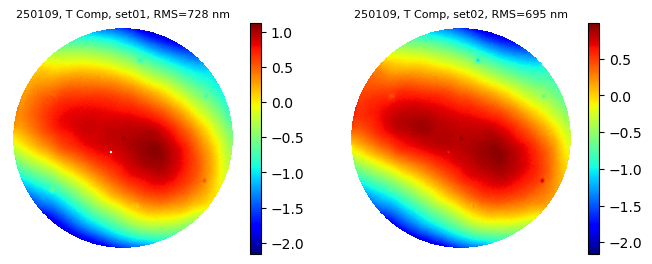

In [44]:
# with T comp
dateID = '250109'
ts_list = []
fig, ax = plt.subplots(1,2,figsize=(8,3))
for i in range(2):
    irow = np.int8(i/2)
    icol = np.mod(i,2)
    
    fileset = sorted(glob.glob('/%s/Sec 5/%s/%s*set0%d*comp.h5'%(ml_data_dir,dateID, dateID, i+1)))
    if len(fileset)>0:
        m1s,centerRow,centerCol,pixelSize,ts = readH5Map(fileset)
        ts_list.append(ts)

        m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
        img = ax[icol].imshow(m1s, origin='lower')
        fig.colorbar(img, ax=ax[icol])
        ax[icol].set_title('%s, T Comp, set0%d, RMS=%.0f nm'%(dateID,i+1, m1rms), fontsize=8)
        ax[icol].axis('off')

In [53]:
aa = theta_M1B_deg-theta_M1S_deg
print(aa, (1-np.cos(np.radians(aa))))
print(radius_of_CA*np.sin(np.radians(aa)))

-0.07968499999999956 9.671143412770533e-07
-0.00581687530724889


Q: Are the two sets from day 2 both with AcO forces subtracted? or one with and one without?

A: No. They were with the same forces. (see below)

In [7]:
#set1, name it 1-prime (1p)
sa_force1p, tt = getDBData(unix_ts(ts_list[0]),'m1_s1_support_ctrl/s/sa_force/value', duration_in_s=2, samples=1)
sa_force1p_z = np.mean(sa_force1p,axis=0)[:,2]
#set2,
sa_force2, tt = getDBData(unix_ts(ts_list[1]),'m1_s1_support_ctrl/s/sa_force/value', duration_in_s=2, samples=1)
sa_force2_z = np.mean(sa_force2,axis=0)[:,2]

m1_s1_support_ctrl/s/sa_force/value
2025-01-09 13:19:10  duration =  2  s
(1, 170, 3)
(1, 170, 3)
m1_s1_support_ctrl/s/sa_force/value
2025-01-09 13:41:45  duration =  2  s
(1, 170, 3)
(1, 170, 3)


input forces and output figure both in M1B


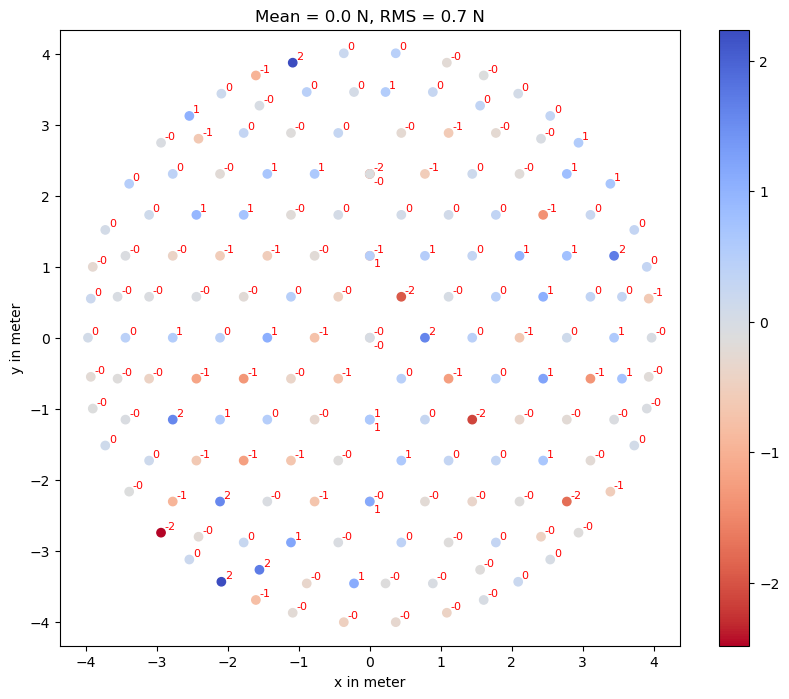

In [8]:
aa = sa_force1p_z-sa_force2_z #-swFvec2gmtFvec(f_active)
showForceMap_M1B(aa,'Mean = %.1f N, RMS = %.1f N'%(np.mean(aa), np.std(aa-np.mean(aa))))

Q: Were the day2 forces really day1 forces minus AcO forces?

A: yes, but a few SAs seems to be off a bit. See below.

In [9]:
dataFolder = '../model_data/'
df = pd.read_excel(dataFolder+'gmt3_final_forces_english.xlsx', skiprows=2)
nact_sw = len(df)
print('Number of actuators = ', nact_sw)

sax_sw = np.array(df['y_opt (in)'])*in2mm/1000 #swap x/y to get to M1B (M1DCS uses M1B!!!)
say_sw = np.array(df['x_opt (in)'])*in2mm/1000
f_FEM = np.array(df['f_FEM (lbs)'])*lbs2N
f_active = np.array(df['f_active (lbs)'])*lbs2N
f_quad = np.array(df['newquad_corr (lbs)'])*lbs2N
f_corr = np.array(df['gmto_zfrc (lbs)'])*lbs2N
saID_sw_q = np.array(df['act #']) #steve west assigned these IDs, whether they are same as Trupti's is Questionable

Number of actuators =  170


input forces and output figure both in M1B


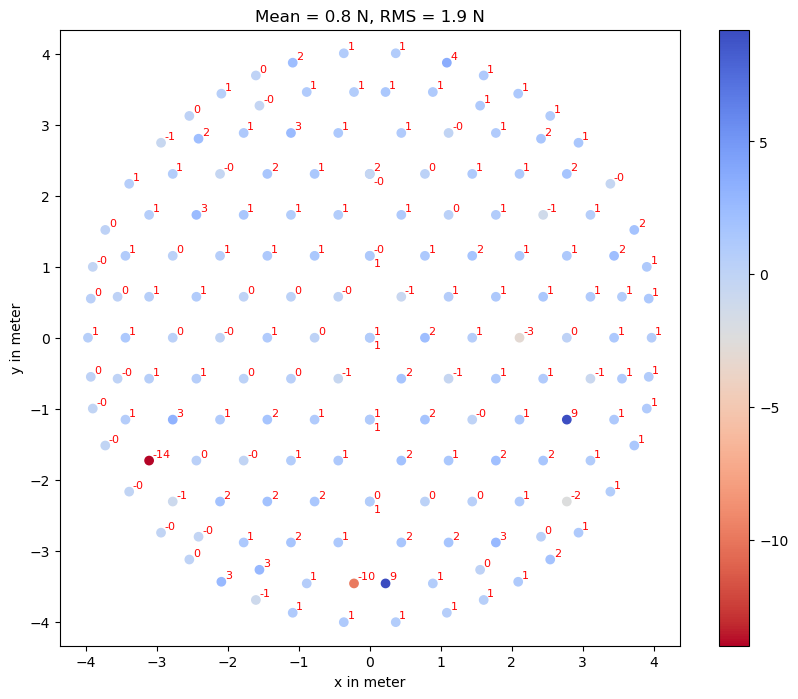

In [10]:
aa = sa_force1_z-sa_force2_z-swFvec2gmtFvec(f_active)
showForceMap_M1B(aa,'Mean = %.1f N, RMS = %.1f N'%(np.mean(aa), np.std(aa-np.mean(aa))))

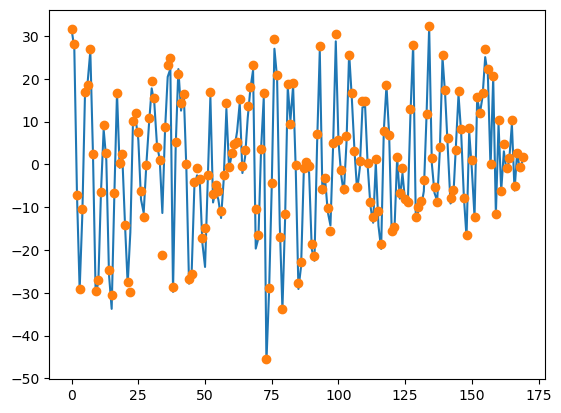

In [11]:
plt.plot(swFvec2gmtFvec(f_active))
plt.plot(sa_force1_z-sa_force2_z, 'o')